In [1]:
# NSSTRUC_DEMO.IPYNB -- minimal working example of running the ns-struc TOV solver from within a python notebook

In [2]:
# download and install the code

%%bash
# make this cell an instance of a terminal

git clone https://github.com/landryp/ns-struc-modes.git # download code repository from https://github.com/landryp/ns-struc/tree/enthalpy

mkdir /opt/bin /opt/lib/ /opt/lib/python2.7 /opt/lib/python2.7/site-packages # create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd ns-struc-modes # install code
python2 setup.py install --prefix /opt/

echo -e '\n *** \n'

getnsprops -h # this is the executable from ns-struc that solves the TOV equations to compute neutron star observables; print its help string to see the syntax for calling it

echo -e '\n *** \n'

running install
running bdist_egg
running egg_info
creating ns_struc_modes.egg-info
writing ns_struc_modes.egg-info/PKG-INFO
writing top-level names to ns_struc_modes.egg-info/top_level.txt
writing dependency_links to ns_struc_modes.egg-info/dependency_links.txt
writing manifest file 'ns_struc_modes.egg-info/SOURCES.txt'
writing manifest file 'ns_struc_modes.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib.linux-x86_64-2.7
creating build/lib.linux-x86_64-2.7/nsstruc
copying nsstruc/struceqs.py -> build/lib.linux-x86_64-2.7/nsstruc
copying nsstruc/constants.py -> build/lib.linux-x86_64-2.7/nsstruc
copying nsstruc/tov.py -> build/lib.linux-x86_64-2.7/nsstruc
copying nsstruc/pltsetup.py -> build/lib.linux-x86_64-2.7/nsstruc
copying nsstruc/__init__.py -> build/lib.linux-x86_64-2.7/nsstruc
copying nsstruc/branch.py -> build/lib.linux-x86_64-2.7/nsstruc
copying nsstruc/macro.py -> build/lib.l

Cloning into 'ns-struc-modes'...
zip_safe flag not set; analyzing archive contents...


In [3]:
# calculate neutron star observables for a given equation of state

%%bash
# this cell is a separate terminal instance

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

getnsprops mpa1.csv -p M,R,Lambda -m 1.,3. -d ns-struc-modes/ -o ./ -v # call the executable that computes the neutron star observables
# getnsprops [eos table] -p [observables to calculate] -m [mass range to calculate them for] -d [directory where the eos table lives] -o [directory where the table of observables should be output]

Calculate properties of mpa1 stars
Start at mass 1.0 Msun
Done at mass 3.0 Msun


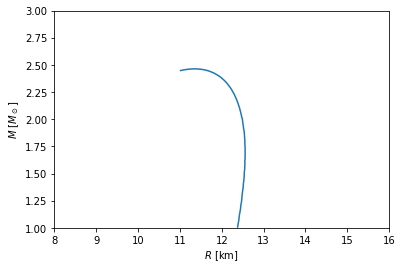

In [4]:
# load the table of observables and plot the mass-radius relation predicted by the given equation of state

# this is a normal python notebook cell

import numpy as np # import packages
import matplotlib.pyplot as plt

mrl_data = np.genfromtxt('macro-mpa1.csv',delimiter=',',names=True,dtype=None) # load the table of neutron star observables that was created above

plt.plot(mrl_data['R'],mrl_data['M']) # plot the mass-radius relation

plt.xlabel(r'$R$ [km]') # add plot labels, etc.
plt.ylabel(r'$M$ [$M_\odot$]')
plt.xlim(8.,16.)
plt.ylim(1.,3.)
plt.show()